# Ex02 KNeighbors Classifier
Outline
- Load data from scikit-learn dataset
- Check data and target
- Check overview by class
- If k = 3 result
- k = ? graph
- Summary

### Load data from scikit-learn dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris= load_iris() # import iris
X = iris.data     # x data
Y = iris.target   # y data

#Change dataflame
iris_data = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = pd.DataFrame(Y, columns=['Species'])

### Check data and target

In [3]:
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris_target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Check overview by class

/Users/yuta.u/opt/anaconda3/envs/Python3/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


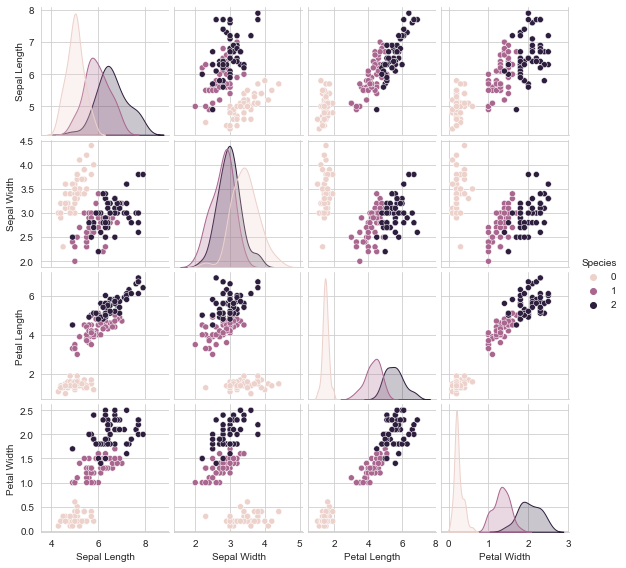

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = pd.concat([iris_data, iris_target], axis=1)
sns.set_style('whitegrid')
%matplotlib inline

#seaborn pairplot
sns.pairplot(iris, hue = 'Species', size =2)

### If k = 3 result

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # trainとtest分割用

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3) 

knn = KNeighborsClassifier(n_neighbors=3) # make knn
knn.fit(X_train, Y_train)                 # make knn model
Y_pred = knn.predict(X_test)              # predict test

# generate accuracy
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

0.95

### k = ? graph

Text(0, 0.5, 'Accuracy')

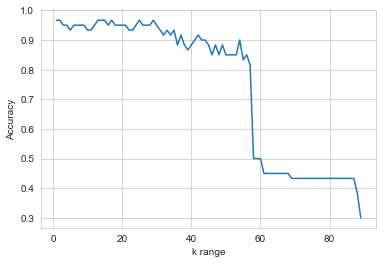

In [7]:
accuracy = []
k_range = []
for k in range(1, 90): #n_sample = 90
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train)                 
    Y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred)) # Accuracy append list per k number
    k_range.append(k)

plt.plot(k_range, accuracy)
plt.xlabel("k range")
plt.ylabel("Accuracy")

### Summary
 There is no learning phase in the KNN algorithm, so analysis can begin as soon as the data is prepared.
 Also, the simplicity of the algorithm makes the prediction results easy for humans to understand, and the output results can be explained and analyzed.
 Just the fact that the prediction results are not a black box is a major advantage over other machine learning methods.
 The disadvantage is that knn performs all calculations during the estimation phase.
 The amount of computation increases rapidly with the amount of data in O(N) because it is necessary to compute the distances for all the estimated and training data.
 It also requires a large amount of memory because it needs to store the distances for all the data.
 Although storing training data using a tree structure allows for efficient computation, kNN is generally not suited for large data sets.
 kNN assumes a process where "as the amount of data is increased, training data can be found near unknown data.
 However, this is not necessarily true for high-dimensional data, so other methods should be considered for audio and image data.